<a href="https://colab.research.google.com/github/WinnieSue/sales_predictions/blob/main/salespreictionsnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sales prediction for food items sold at various stores

In [20]:
import pandas as pd
sales_prediction = '/content/sales_predictions.csv'
df = pd.read_csv(sales_prediction)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# how many rows and columns does the data have
df.shape
# Row 8,523
# columns 12

(8523, 12)

In [3]:
# getting general info on the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#datatypes for the data
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# finding duplicates
df.duplicated().sum()

# there are no duplicates on the data

0

In [6]:
# Finding missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Dealing with the missing values

In [7]:
# for the missing values in the weight column, we are going to use the item identifier to fill in the missing weights. Help from Kamal
predict_weights = df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
df['Item_Weight'].fillna(predict_weights, inplace = True)

In [8]:
# checking if there are still more missing values in weight column
df['Item_Weight'].isna().sum()

4

In [9]:
# I am dropping the remaining four rows
df.dropna(subset = ['Item_Weight'], inplace = True)
df['Item_Weight'].isna().sum()

0

In [10]:
# I am also dropping the Outlet Size column as it doesn't have an effect on the sales predictions
df.pop('Outlet_Size')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [11]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no more missing values

In [12]:
# Checking for inconsistencies
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

The data types match the Item and Outlets. So no inconsistencies

In [13]:
# for numerical columns, finding mean, min, max
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Location_Type       8519 non-null   object 
 9   Outlet_Type                8519 non-null   object 
 10  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 798.7+ KB


***Histogram to view the distributions of various features in your dataset.***


In [15]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline


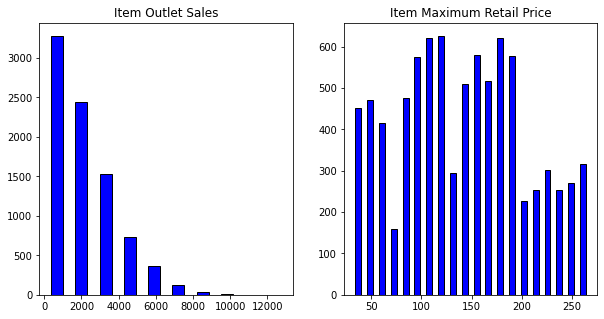

In [16]:
plt.figure(figsize=(10,5)) #setting the size of the figures
# subplot 1
plt.subplot(1, 2, 1);
plt.hist(df['Item_Outlet_Sales'], bins = 10, edgecolor = 'black', color = 'blue', rwidth = 0.5);
plt.title('Item Outlet Sales', fontsize = 12);
# subplot 2
plt.subplot(1, 2, 2);
plt.hist(df['Item_MRP'], bins = 20, edgecolor = 'black', color = 'blue', rwidth = 0.5);
plt.title('Item Maximum Retail Price', fontsize = 12);

From the above Histogram I can say that items with lower prices sell more than high priced items

Boxplot to view statistical summaries of various features in your dataset.
Going to do this for outlet type and Item outlet sales

Text(0.5, 1.0, 'Statistical Summaries of Item outlet sales per Outlet')

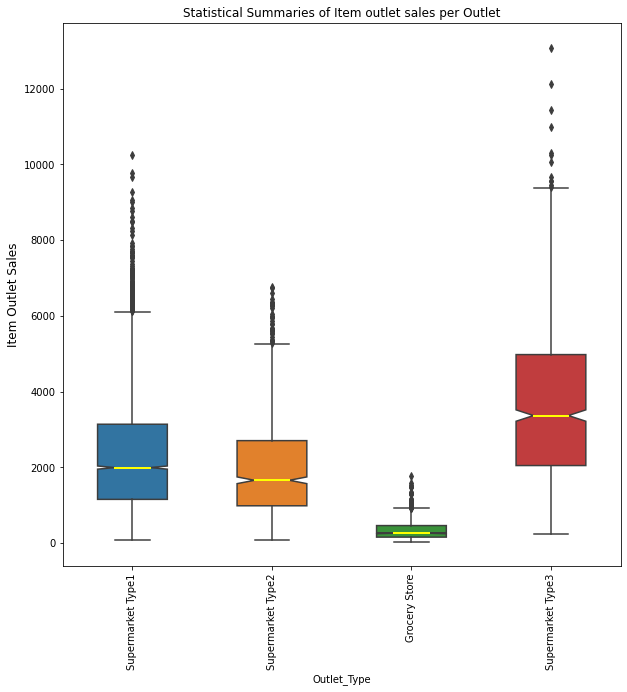

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x = 'Outlet_Type', y ='Item_Outlet_Sales' , data = df, width = 0.5, notch = True, medianprops = dict(linestyle='-', linewidth=2, color='Yellow'))
plt.xticks(Rotation = 90)
plt.ylabel('Item Outlet Sales', fontsize = 12)
plt.title('Statistical Summaries of Item outlet sales per Outlet')

In [18]:
# Heatmap of the correlation between features.
corr_df = df.corr()
corr_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


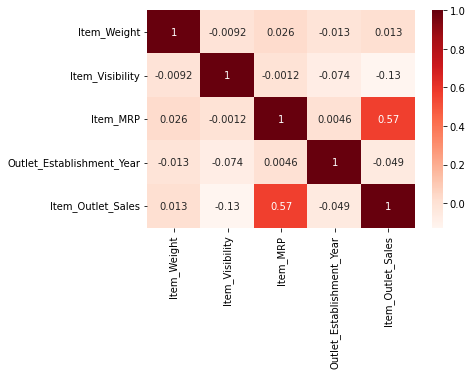

In [19]:
sns.heatmap(corr_df, cmap = 'Reds', annot = True)

Most of the correlation is weak except for Item MRP and the Item outlet sales. This is so because as the price increases on a certain item, it's sales are likely to go down. Also these two are related. the price of an item influences the sales of that product. So it is a moderate correlation here.

In [32]:
# Finding total sales per outlet.
# aggregate outlet sales
total_sales = df.groupby('Outlet_Type').agg({'Item_Outlet_Sales': 'sum'})
#total_sales
total_sales.reset_index()

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


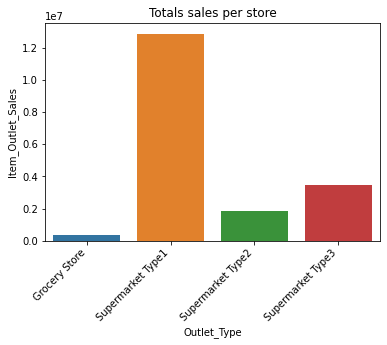

In [35]:
#plotting the total sales histogram using seaborn
myplot = sns.barplot(x = 'Outlet_Type', 
            y= 'Item_Outlet_Sales', 
            data =total_sales.reset_index())
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45, horizontalalignment = 'right');
plt.title('Totals sales per store');

What is interesting is that it is clear that the most sales where by Supermarket type 1. And therefore it would be to have your item is supermarket type 1 for a higher probability of it being bought,

In [41]:
theitem = df.groupby('Item_Identifier').sum()
theitem.Item_MRP

Item_Identifier
DRA12     851.1924
DRA24    1148.6076
DRA59    1481.4392
DRB01     568.7590
DRB13     948.4650
           ...    
NCZ30     845.2686
NCZ41     628.1520
NCZ42    1183.2240
NCZ53     941.6070
NCZ54    1135.7864
Name: Item_MRP, Length: 1559, dtype: float64

In [42]:
theitem.Item_Outlet_Sales

Item_Identifier
DRA12    11061.6012
DRA24    15723.5328
DRA59    20915.4412
DRB01     4554.0720
DRB13    12144.1920
            ...    
NCZ30    12653.5290
NCZ41     9137.4392
NCZ42    19199.0088
NCZ53    15073.7120
NCZ54    22743.7280
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

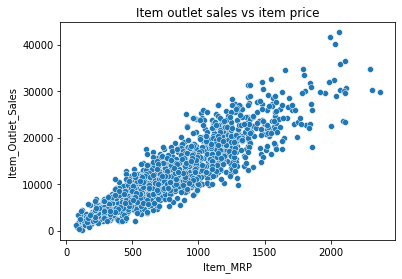

In [50]:
# plotting a scatter plot for item price and item sales
sns.scatterplot(y = theitem.Item_Outlet_Sales, x = theitem.Item_MRP, data = df);
plt.title('Item outlet sales vs item price');
#there is a linear relationship between Item sales and the Item MRP. 

We can see that as the item MRP goes beyond 1500, the item sales are reducing. As the price goes high,the item sales reduce. Something to put into consideration when trying to see how salable the item is.